### Objetivo: desenvolver gráfico que mostre a quantidade de nascimentos em cada dia da semana, entre os anos 1970 e 1987.

#### 1º - Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#### 2º - Pegando dados de fonte externa:

In [2]:
db = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

#### 3º - Renomeando colunas

In [3]:
db = db.rename(columns={'year':'ano','month':'mes','day':'dia','gender':'genero','births':'nasc'})

    #Removendo linhas com NaN
db = db.dropna()

    #Testando se os NaN foram descartados

print(db.dia.unique())
print(db.ano.unique())
print(db.mes.unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99.]
[1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


#### 4º - Remover o dia 99, porque não existe 99 dias no mês

In [4]:
db = db.drop(db[db['dia'] > 31].index)
db

    #Conferindo se o 99 foi removido
db.dia.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])

#### 5º - Filtrar o ano

In [5]:
db = db[(db['ano'] >= 1970) & (db['ano'] <= 1987)]

#### 6º - Entender os data types das colunas

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13241 entries, 768 to 14327
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ano     13241 non-null  int64  
 1   mes     13241 non-null  int64  
 2   dia     13241 non-null  float64
 3   genero  13241 non-null  object 
 4   nasc    13241 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 620.7+ KB


#### 7º - Transformar o data type de dia de float para int

In [7]:
db['dia'] = db['dia'].apply(lambda x: int(x))
db['dia']

768       1
769       1
770       2
771       2
772       3
         ..
14323    29
14324    30
14325    30
14326    31
14327    31
Name: dia, Length: 13241, dtype: int64

#### 8º - Transformar o data type de ano, mes e dia de int para string

In [8]:
db['dia'] = db['dia'].values.astype(str)
db['mes'] = db['mes'].values.astype(str)
db['ano'] = db['ano'].values.astype(str)

    #Checando se o data type mudou
db.info()

    #Checando se a conversão de tipo preservou a informação corretamente
    
print(db['dia'])
print(db['mes'])
print(db['ano'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13241 entries, 768 to 14327
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ano     13241 non-null  object
 1   mes     13241 non-null  object
 2   dia     13241 non-null  object
 3   genero  13241 non-null  object
 4   nasc    13241 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 620.7+ KB
768       1
769       1
770       2
771       2
772       3
         ..
14323    29
14324    30
14325    30
14326    31
14327    31
Name: dia, Length: 13241, dtype: object
768       1
769       1
770       1
771       1
772       1
         ..
14323    12
14324    12
14325    12
14326    12
14327    12
Name: mes, Length: 13241, dtype: object
768      1970
769      1970
770      1970
771      1970
772      1970
         ... 
14323    1987
14324    1987
14325    1987
14326    1987
14327    1987
Name: ano, Length: 13241, dtype: object


#### 9º - Criando uma coluna, que é a data_inteira

In [9]:
db['data_inteira'] = db['ano'] + '-' + db['mes'] + '-' + db['dia']

db['data_inteira']

    #Confirmando se uma nova coluna (data_inteira) foi criada
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13241 entries, 768 to 14327
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           13241 non-null  object
 1   mes           13241 non-null  object
 2   dia           13241 non-null  object
 3   genero        13241 non-null  object
 4   nasc          13241 non-null  int64 
 5   data_inteira  13241 non-null  object
dtypes: int64(1), object(5)
memory usage: 724.1+ KB


#### 10º - Convertendo a coluna data_inteira em data

In [10]:
    # Obs.: If 'coerce', then invalid parsing will be set as NaT (not a time).
db['data_inteira'] = pd.to_datetime(db['data_inteira'], errors= 'coerce') 

    #Confirmando se a coluna (data_inteira) virou data
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13241 entries, 768 to 14327
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ano           13241 non-null  object        
 1   mes           13241 non-null  object        
 2   dia           13241 non-null  object        
 3   genero        13241 non-null  object        
 4   nasc          13241 non-null  int64         
 5   data_inteira  13148 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 724.1+ KB


#### 11º - Checando se tem algumm valor NaT

In [11]:
db.query('data_inteira == "NaT"')

,ano,mes,dia,genero,nasc,data_inteira
888,1970,2,29,F,38,NaT
889,1970,2,29,M,44,NaT
890,1970,2,30,F,20,NaT
891,1970,2,30,M,12,NaT
892,1970,2,31,F,8,NaT
...,...,...,...,...,...,...
7253,1978,6,31,M,3,NaT
7443,1978,9,31,F,2,NaT
7444,1978,9,31,M,3,NaT
7571,1978,11,31,F,2,NaT


#### 12º - Remover os NaT da coluna data inteira

In [12]:
db = db.dropna()
db

    #Confirmando que o NaT foi removido
db.query('data_inteira == "NaT"')

,ano,mes,dia,genero,nasc,data_inteira


#### 13º - Criar coluna com o dia da semana

In [13]:
db['dia_semana'] = db['data_inteira'].apply(lambda x: x.day_name())
db

,ano,mes,dia,genero,nasc,data_inteira,dia_semana
768,1970,1,1,F,4064,1970-01-01,Thursday
769,1970,1,1,M,4308,1970-01-01,Thursday
770,1970,1,2,F,4536,1970-01-02,Friday
771,1970,1,2,M,4698,1970-01-02,Friday
772,1970,1,3,F,4398,1970-01-03,Saturday
...,...,...,...,...,...,...,...
14323,1987,12,29,M,6322,1987-12-29,Tuesday
14324,1987,12,30,F,5792,1987-12-30,Wednesday
14325,1987,12,30,M,6051,1987-12-30,Wednesday
14326,1987,12,31,F,5344,1987-12-31,Thursday


#### 14º - Criar listas de week_day e celestial

In [14]:
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
celestial = ['moon','mars','mercury','jupiter','venus','saturn','sun']

    #Fazendo o dataframe novo (a partir de um dicionário).
    
astral_map = pd.DataFrame({'dia_semana': week_day,
                            'celestial':celestial})
astral_map

,dia_semana,celestial
0,Monday,moon
1,Tuesday,mars
2,Wednesday,mercury
3,Thursday,jupiter
4,Friday,venus
5,Saturday,saturn
6,Sunday,sun


#### 15º - Fazer o merge dos data frames

In [15]:
merge_db = pd.merge(db, astral_map, left_on = 'dia_semana', right_on = 'dia_semana')
merge_db

,ano,mes,dia,genero,nasc,data_inteira,dia_semana,celestial
0,1970,1,1,F,4064,1970-01-01,Thursday,jupiter
1,1970,1,1,M,4308,1970-01-01,Thursday,jupiter
2,1970,1,8,F,4744,1970-01-08,Thursday,jupiter
3,1970,1,8,M,5012,1970-01-08,Thursday,jupiter
4,1970,1,15,F,4764,1970-01-15,Thursday,jupiter
...,...,...,...,...,...,...,...,...
13143,1987,12,16,M,5648,1987-12-16,Wednesday,mercury
13144,1987,12,23,F,4988,1987-12-23,Wednesday,mercury
13145,1987,12,23,M,5313,1987-12-23,Wednesday,mercury
13146,1987,12,30,F,5792,1987-12-30,Wednesday,mercury


#### 16º Fazer o gráfico de dias da semana em que nascimentos ocorrem

<AxesSubplot:xlabel='ano'>

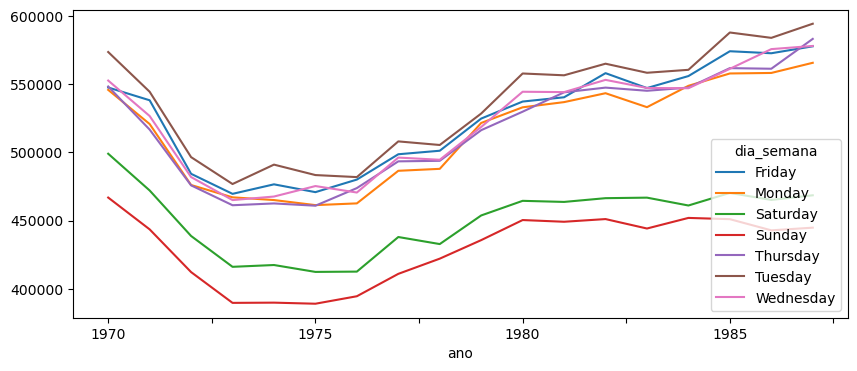

In [16]:
nasc_dia_semana = db.pivot_table('nasc', index='ano',columns='dia_semana', aggfunc='sum')
nasc_dia_semana.plot(figsize=(10,4))